<a href="https://colab.research.google.com/github/Gbhavya123/SafeChat/blob/main/Toxic_Chat_Detection_using_BiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toxic Chat Detection using BiLSTM (DEMO)

In [ ]:
# importing libraries
import pandas as pd
import spacy
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
#from keras.regularizers import l2
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
df.shape

(159571, 8)

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
# 1. DELETING UNWANTED COLUMNS
df.drop(columns = ['id' ],
        inplace = True)

In [ ]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
# 2. CHECKING NULL VALUES
df.isna().sum()

,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [ ]:
df['comment_text'].iloc[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [ ]:
df['comment_text'].iloc[100]

'However, the Moonlite edit noted by golden daph was me (on optus ...)  Wake up wikkis.  So funny'

In [ ]:
# 3. REPLACING SYMBOLS AND NUMBERS FROM TEXT
df['processed_comment'] = df['comment_text'].str.replace(r'[^a-zA-Z]', ' ', regex = True)

In [ ]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,processed_comment
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation Why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D aww He matches this background colour I m s...
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Hey man I m really not trying to edit war It...
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,More I can t make any real suggestions on im...
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,You sir are my hero Any chance you remember...


In [ ]:
df['processed_comment'].iloc[0]

'Explanation Why the edits made under my username Hardcore Metallica Fan were reverted  They weren t vandalisms  just closure on some GAs after I voted at New York Dolls FAC  And please don t remove the template from the talk page since I m retired now             '

In [ ]:
df['processed_comment'].iloc[1000]

'Rex Mundi   I ve created a stub on Rex Mundi at Rex Mundi High School   Only thing I know about it is that both my Aunt Donna and Bob Griese went there   Please add anything you might know about it   BTW  my dad was a Panther  I live in Princeton myself '

In [ ]:
# 4. REPLACING MULTIPLE WHITESPACE CHARACTERS WITH SINGLE ONE
df['processed_comment_2'] = df['processed_comment'].str.replace(r'[\s]+', ' ', regex = True)

In [ ]:
df['processed_comment_2'].iloc[0]

'Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They weren t vandalisms just closure on some GAs after I voted at New York Dolls FAC And please don t remove the template from the talk page since I m retired now '

In [ ]:
df['processed_comment_2'].iloc[1000]

'Rex Mundi I ve created a stub on Rex Mundi at Rex Mundi High School Only thing I know about it is that both my Aunt Donna and Bob Griese went there Please add anything you might know about it BTW my dad was a Panther I live in Princeton myself '

In [ ]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,processed_comment,processed_comment_2
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation Why the edits made under my userna...,Explanation Why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D aww He matches this background colour I m s...,D aww He matches this background colour I m se...
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Hey man I m really not trying to edit war It...,Hey man I m really not trying to edit war It s...
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,More I can t make any real suggestions on im...,More I can t make any real suggestions on imp...
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,You sir are my hero Any chance you remember...,You sir are my hero Any chance you remember wh...


In [ ]:
import pandas as pd
import numpy as np

# original labels
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


# Condition 1: If ALL labels are 0
cond_0 = (df[labels].sum(axis=1) == 0)

# Condition 2: If severe_toxic OR identity_hate is 1
cond_1 = (df['severe_toxic'] == 1) | (df['identity_hate'] == 1)

# Condition 3: Otherwise (any other toxic label is 1)


conditions = [cond_0, cond_1]
choices = [0, 1]

df['class'] = np.select(conditions, choices, default=2)

# final distribution
print(df['class'].value_counts())

class
0    143346
2     13538
1      2687
Name: count, dtype: int64


In [ ]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,processed_comment,processed_comment_2,class
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation Why the edits made under my userna...,Explanation Why the edits made under my userna...,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D aww He matches this background colour I m s...,D aww He matches this background colour I m se...,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Hey man I m really not trying to edit war It...,Hey man I m really not trying to edit war It s...,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,More I can t make any real suggestions on im...,More I can t make any real suggestions on imp...,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,You sir are my hero Any chance you remember...,You sir are my hero Any chance you remember wh...,0


In [ ]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,processed_comment,processed_comment_2,class
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,Explanation Why the edits made under my userna...,Explanation Why the edits made under my userna...,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,D aww He matches this background colour I m s...,D aww He matches this background colour I m se...,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,Hey man I m really not trying to edit war It...,Hey man I m really not trying to edit war It s...,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,More I can t make any real suggestions on im...,More I can t make any real suggestions on imp...,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,You sir are my hero Any chance you remember...,You sir are my hero Any chance you remember wh...,0


In [ ]:

from sklearn.model_selection import train_test_split




# filter out 20% of the data while class proportions balaced
remaining_df, filtered_df = train_test_split(
    df,
    test_size=0.5,
    stratify=df['class'],
    random_state=42
)

print(f"Original distribution:\n{df['class'].value_counts()}")
print(f"Filtered distribution:\n{filtered_df['class'].value_counts()}")

Original distribution:
class
0    14335
2     1354
1      269
Name: count, dtype: int64
Filtered distribution:
class
0    7168
2     677
1     134
Name: count, dtype: int64


In [ ]:
df = filtered_df

In [ ]:
df['insult'].value_counts()

,count
insult,
0,7603
1,376


In [ ]:
# load out spacy modeule
nlp = spacy.load('en_core_web_sm')

In [ ]:
# 6. LEMMATIZATION
def lemmatization(text):
  doc = nlp(text)
  lemmaList = [word.lemma_ for word in doc]
  return ' '.join(lemmaList)

df['lemma_comment'] = df['processed_comment_2'].apply(lemmatization)

In [ ]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,processed_comment,processed_comment_2,class,lemma_comment
143409,User:XavierAV \n\nI have reported this user to...,0,0,0,0,0,0,User XavierAV I have reported this user to t...,User XavierAV I have reported this user to the...,0,user XavierAV I have report this user to the a...
115490,Im Nicholas Chiha... I Was Born In South Afica...,0,0,0,0,0,0,Im Nicholas Chiha I Was Born In South Afica...,Im Nicholas Chiha I Was Born In South Afica Ja...,0,I m Nicholas Chiha I be bear in South Afica Ja...
107682,"""\nI have granted rollback rights to your acco...",0,0,0,0,0,0,I have granted rollback rights to your accou...,I have granted rollback rights to your accoun...,0,I have grant rollback right to your account ...
106143,"""\n\n hey \n\ni saw ur edits on tennis and i t...",0,0,0,0,0,0,hey i saw ur edits on tennis and i think...,hey i saw ur edits on tennis and i think u de...,0,hey I see ur edit on tennis and I think u de...
27909,"Orangedumbshit and Tard Gogo, I'm guessing you...",0,0,0,0,0,0,Orangedumbshit and Tard Gogo I m guessing you...,Orangedumbshit and Tard Gogo I m guessing your...,0,Orangedumbshit and Tard Gogo I m guess your br...


In [ ]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,processed_comment,processed_comment_2,class,lemma_comment
143409,User:XavierAV \n\nI have reported this user to...,0,0,0,0,0,0,User XavierAV I have reported this user to t...,User XavierAV I have reported this user to the...,0,user XavierAV I have report this user to the a...
115490,Im Nicholas Chiha... I Was Born In South Afica...,0,0,0,0,0,0,Im Nicholas Chiha I Was Born In South Afica...,Im Nicholas Chiha I Was Born In South Afica Ja...,0,I m Nicholas Chiha I be bear in South Afica Ja...
107682,"""\nI have granted rollback rights to your acco...",0,0,0,0,0,0,I have granted rollback rights to your accou...,I have granted rollback rights to your accoun...,0,I have grant rollback right to your account ...
106143,"""\n\n hey \n\ni saw ur edits on tennis and i t...",0,0,0,0,0,0,hey i saw ur edits on tennis and i think...,hey i saw ur edits on tennis and i think u de...,0,hey I see ur edit on tennis and I think u de...
27909,"Orangedumbshit and Tard Gogo, I'm guessing you...",0,0,0,0,0,0,Orangedumbshit and Tard Gogo I m guessing you...,Orangedumbshit and Tard Gogo I m guessing your...,0,Orangedumbshit and Tard Gogo I m guess your br...


In [ ]:
df['processed_comment_2'].iloc[67]

' The thing is old teninch removes that list while adding the same kind of thing to other articles ALSO people like myself and the user spongbob spent time in that mall where the idiot didn t If he wouldn t keep reverting I could spend more time researching the dates eventually we would like to put the list in chronological order to us it s like losing an old friend I at least grew up in that mall in it s heyday Think you can talk some sense into him '

In [ ]:
df['lemma_comment'].iloc[67]

'  the thing be old teninch remove that list while add the same kind of thing to other article also people like myself and the user spongbob spend time in that mall where the idiot didn t if he wouldn t keep revert I could spend more time research the date eventually we would like to put the list in chronological order to we it s like lose an old friend I at least grow up in that mall in it s heyday think you can talk some sense into he'

In [ ]:
# 7. REMOVING STOPWORDS
def remove_stopwords(text):
  doc = nlp(text)
  no_stopwords_list = [word.text for word in doc if not word.is_stop]
  return ' '.join(no_stopwords_list)

df['final_comment'] = df['lemma_comment'].apply(remove_stopwords)

In [ ]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,processed_comment,processed_comment_2,class,lemma_comment,final_comment
143409,User:XavierAV \n\nI have reported this user to...,0,0,0,0,0,0,User XavierAV I have reported this user to t...,User XavierAV I have reported this user to the...,0,user XavierAV I have report this user to the a...,user XavierAV report user administrators board...
115490,Im Nicholas Chiha... I Was Born In South Afica...,0,0,0,0,0,0,Im Nicholas Chiha I Was Born In South Afica...,Im Nicholas Chiha I Was Born In South Afica Ja...,0,I m Nicholas Chiha I be bear in South Afica Ja...,m Nicholas Chiha bear South Afica Japan Love M...
107682,"""\nI have granted rollback rights to your acco...",0,0,0,0,0,0,I have granted rollback rights to your accou...,I have granted rollback rights to your accoun...,0,I have grant rollback right to your account ...,grant rollback right account reason review ...
106143,"""\n\n hey \n\ni saw ur edits on tennis and i t...",0,0,0,0,0,0,hey i saw ur edits on tennis and i think...,hey i saw ur edits on tennis and i think u de...,0,hey I see ur edit on tennis and I think u de...,hey ur edit tennis think u deserve barnstar...
27909,"Orangedumbshit and Tard Gogo, I'm guessing you...",0,0,0,0,0,0,Orangedumbshit and Tard Gogo I m guessing you...,Orangedumbshit and Tard Gogo I m guessing your...,0,Orangedumbshit and Tard Gogo I m guess your br...,Orangedumbshit Tard Gogo m guess brain cease f...


In [ ]:
df['final_comment'].iloc[67]

'   thing old teninch remove list add kind thing article people like user spongbob spend time mall idiot didn t wouldn t revert spend time research date eventually like list chronological order s like lose old friend grow mall s heyday think talk sense'

In [ ]:
# 8. ONE - HOT ENCODING

vocab_size = 10000
one_hot_representation = [one_hot(words, vocab_size) for words in df['final_comment']]

In [ ]:
import os

#  path to model
model_save_path = 'my_hate_speech_detection_model.h5'

# Saving the entire model architecture

if 'model' in locals() and model:
    model.save(model_save_path)
    print(f"Trained model saved to {model_save_path}")
else:
    print("Model variable not found or not trained. Please train your model first.")

Model variable not found or not trained. Please train your model first.


In [ ]:
df['final_comment'].iloc[0]

'user XavierAV report user administrators board inappropriate edit Wikipedia tolerate'

In [ ]:
one_hot_representation[100]

[2685,
 7059,
 4040,
 5690,
 42,
 5633,
 5938,
 2290,
 2475,
 2027,
 3632,
 7633,
 4040,
 1113,
 4321,
 7420,
 6246,
 7059,
 527,
 308,
 4036,
 3632,
 1146,
 4375,
 3159,
 1146,
 7123,
 5865,
 9530,
 6436,
 5603,
 455,
 3398]

In [ ]:
# 9. PADDING AND EMBEDDING

sentence_length = 20
embedded_comment = pad_sequences(one_hot_representation, padding='pre', maxlen = sentence_length)

In [ ]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,processed_comment,processed_comment_2,class,lemma_comment,final_comment
143409,User:XavierAV \n\nI have reported this user to...,0,0,0,0,0,0,User XavierAV I have reported this user to t...,User XavierAV I have reported this user to the...,0,user XavierAV I have report this user to the a...,user XavierAV report user administrators board...
115490,Im Nicholas Chiha... I Was Born In South Afica...,0,0,0,0,0,0,Im Nicholas Chiha I Was Born In South Afica...,Im Nicholas Chiha I Was Born In South Afica Ja...,0,I m Nicholas Chiha I be bear in South Afica Ja...,m Nicholas Chiha bear South Afica Japan Love M...
107682,"""\nI have granted rollback rights to your acco...",0,0,0,0,0,0,I have granted rollback rights to your accou...,I have granted rollback rights to your accoun...,0,I have grant rollback right to your account ...,grant rollback right account reason review ...
106143,"""\n\n hey \n\ni saw ur edits on tennis and i t...",0,0,0,0,0,0,hey i saw ur edits on tennis and i think...,hey i saw ur edits on tennis and i think u de...,0,hey I see ur edit on tennis and I think u de...,hey ur edit tennis think u deserve barnstar...
27909,"Orangedumbshit and Tard Gogo, I'm guessing you...",0,0,0,0,0,0,Orangedumbshit and Tard Gogo I m guessing you...,Orangedumbshit and Tard Gogo I m guessing your...,0,Orangedumbshit and Tard Gogo I m guess your br...,Orangedumbshit Tard Gogo m guess brain cease f...


In [ ]:
embedded_comment[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 8069,
       7695, 7021, 8069, 8930,  422, 6121, 8681, 7333, 9650], dtype=int32)

In [ ]:
# 10. DIVIDING THE DATASET
X = np.array(embedded_comment)
y = np.array(df['class'])

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)

In [ ]:
# 11. TRAIN - TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# 12. CREATING MODEL

dimension = 50

model = keras.Sequential([
    #embedding layer
    keras.layers.Embedding(vocab_size, dimension, input_length = sentence_length),
    # LSTM layer
    keras.layers.LSTM(100,return_sequences=True),
    keras.layers.LSTM(50, return_sequences=True),
    keras.layers.LSTM(50),
    #output layer
    keras.layers.Dense(6, activation = 'softmax')
])

#compilation
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 12. CREATING MODEL

dimension = 50

multi_label_model = keras.Sequential([
    #embedding layer
    keras.layers.Embedding(vocab_size, dimension, input_length = sentence_length),
    # LSTM layer
    keras.layers.LSTM(100,return_sequences=True),
    keras.layers.LSTM(50, return_sequences=True),
    keras.layers.LSTM(50),
    #output layer
    keras.layers.Dense(6, activation = 'sigmoid')
])

#compilation
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
multi_label_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10, batch_size=32)

Epoch 1/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.6082 - loss: 0.8491
Epoch 2/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9367 - loss: 0.2210
Epoch 3/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9529 - loss: 0.1565
Epoch 4/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9641 - loss: 0.1137
Epoch 5/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9800 - loss: 0.0752
Epoch 6/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9883 - loss: 0.0477
Epoch 7/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9932 - loss: 0.0297
Epoch 8/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9949 - loss: 0.0218
Epoch 9/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9954 - loss: 0.0193
Epoch 10/10
376/376 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9954 - loss: 0.0214


In [ ]:
train_test_split

# X for multi-label model (from embedded_comment, which is based on the filtered df)
X_multilabel = np.array(embedded_comment)

# Define the multi-label target array from the original label columns
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y_multilabel = df[labels].values

# Train-test split for multi-label data
# Note: SMOTE was applied to the single-label 'class' column previously.
# For multi-label, if resampling is needed, a different strategy would be required.
X_train_multilabel, X_test_multilabel, y_train_multilabel, y_test_multilabel = train_test_split(
    X_multilabel, y_multilabel, test_size=0.2, random_state=42
)

print(f"Shape of X_train_multilabel: {X_train_multilabel.shape}")
print(f"Shape of y_train_multilabel: {y_train_multilabel.shape}")
print(f"Shape of X_test_multilabel: {X_test_multilabel.shape}")
print(f"Shape of y_test_multilabel: {y_test_multilabel.shape}")

Shape of X_train_multilabel: (6383, 20)
Shape of y_train_multilabel: (6383, 6)
Shape of X_test_multilabel: (1596, 20)
Shape of y_test_multilabel: (1596, 6)


In [ ]:
# Compile the multi_label_model with binary_crossentropy loss and fit it
# Assuming multi_label_model was defined in a previous cell.
# If not, please re-run the cell that defines 'multi_label_model'.

multi_label_model.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

# Train the multi-label model
# Using the newly created multi-label training data
history_multilabel = multi_label_model.fit(X_train_multilabel, y_train_multilabel,
                                           epochs=10,  # You can adjust the number of epochs
                                           batch_size=32,
                                           validation_split=0.1) # Using a validation split to monitor performance

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.5324 - loss: 0.2614 - val_accuracy: 0.9890 - val_loss: 0.1323
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.9938 - loss: 0.1399 - val_accuracy: 0.9890 - val_loss: 0.1314
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9931 - loss: 0.1413 - val_accuracy: 0.9890 - val_loss: 0.1317
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9950 - loss: 0.1355 - val_accuracy: 0.9890 - val_loss: 0.1313
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9940 - loss: 0.1321 - val_accuracy: 0.9890 - val_loss: 0.1292
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.9953 - loss: 0.1399 - val_accuracy: 0.9890 - val_loss: 0.1285
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.9936 - loss: 0.1318 - val_accuracy: 0.9890 - val_loss: 0.1299
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9957 - loss: 0.1108 - val_ac

In [ ]:
# Evaluate the multi-label model
loss_multilabel, accuracy_multilabel = multi_label_model.evaluate(X_test_multilabel, y_test_multilabel)
print(f'Multi-label Model Test Loss: {loss_multilabel:.4f}')
print(f'Multi-label Model Test Accuracy: {accuracy_multilabel:.4f}')

# Generate predictions for the multi-label model
predictions_multilabel = multi_label_model.predict(X_test_multilabel)

# You can inspect the predictions, e.g., for the first 5 samples
print("\nFirst 5 multi-label predictions (probabilities):")
print(predictions_multilabel[:5])

# To get binary predictions (0 or 1) for each label, you can apply a threshold (e.g., 0.5)
binary_predictions_multilabel = (predictions_multilabel > 0.5).astype(int)
print("\nFirst 5 multi-label binary predictions:")
print(binary_predictions_multilabel[:5])

print("\nCorresponding first 5 true labels:")
print(y_test_multilabel[:5])

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9934 - loss: 0.0790
Multi-label Model Test Loss: 0.0865
Multi-label Model Test Accuracy: 0.9931
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

First 5 multi-label predictions (probabilities):
[[0.00699751 0.00059145 0.00272483 0.00057592 0.00224975 0.00097769]
 [0.02063048 0.00095436 0.00529924 0.00072425 0.00464158 0.00126789]
 [0.01282411 0.00065131 0.00329353 0.00085202 0.00315283 0.00123665]
 [0.00601745 0.00056248 0.00251501 0.00054458 0.00205116 0.00094012]
 [0.00735436 0.00060677 0.00282216 0.00056991 0.0022986  0.00099621]]

First 5 multi-label binary predictions:
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]

Corresponding first 5 true labels:
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8909 - loss: 0.6374
Class Prediction Model Test Loss: 0.6306
Class Prediction Model Test Accuracy: 0.8878
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step

Classification Report for Class Prediction Model:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1442
           1       0.96      0.90      0.93      1424
           2       0.24      0.26      0.25       137

    accuracy                           0.89      3003
   macro avg       0.70      0.70      0.70      3003
weighted avg       0.89      0.89      0.89      3003



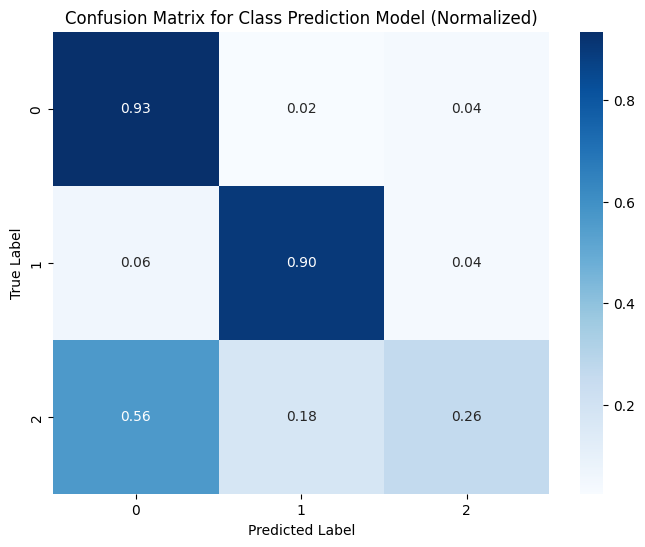

In [ ]:


# Evaluate the 'class' prediction model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Class Prediction Model Test Loss: {loss:.4f}')
print(f'Class Prediction Model Test Accuracy: {accuracy:.4f}')

# Generate predictions for the 'class' model
pred = np.argmax(model.predict(X_test), axis=-1)

# Print classification report
print("\nClassification Report for Class Prediction Model:")
print(classification_report(y_test, pred))

# Plot confusion matrix
cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Confusion Matrix for Class Prediction Model (Normalized)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'BiLSTM Model Accuracy : {accuracy * 100}')

# Generate predictions for classification report and confusion matrix
pred_bilstm = np.argmax(model.predict(X_test), axis = -1)
print(f"First 5 BiLSTM predictions: {pred_bilstm[:5]}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8909 - loss: 0.6374
BiLSTM Model Accuracy : 88.77788782119751
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
First 5 BiLSTM predictions: [0 0 1 1 2]


In [ ]:
pred = np.argmax(model.predict(X_test), axis = -1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [ ]:
y_test[:5]

array([0, 0, 1, 1, 0])

In [ ]:
pred[:5]

array([0, 0, 1, 1, 2])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1442
           1       0.96      0.90      0.93      1424
           2       0.24      0.26      0.25       137

    accuracy                           0.89      3003
   macro avg       0.70      0.70      0.70      3003
weighted avg       0.89      0.89      0.89      3003



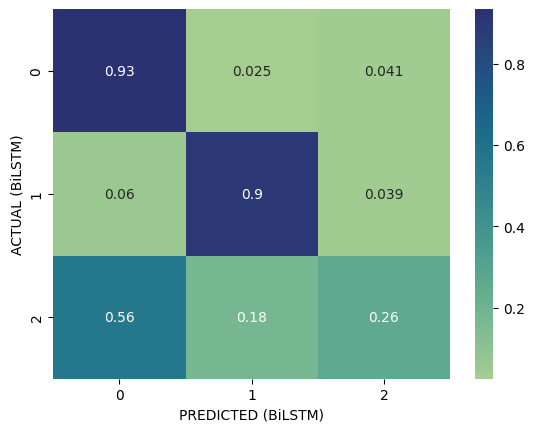

In [ ]:
cf = confusion_matrix(y_test, pred_bilstm, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'crest')
plt.xlabel('PREDICTED (BiLSTM)')
plt.ylabel('ACTUAL (BiLSTM)');

In [ ]:
import pickle
import pandas as pd


# Saving the DataFrame with processed text (e.g., to CSV)
processed_df_save_path = 'processed_data_for_model.csv'
df.to_csv(processed_df_save_path, index=False)
print(f"Processed DataFrame saved to {processed_df_save_path}")

Processed DataFrame saved to processed_data_for_model.csv


In [ ]:
import os

# Define a path to save the single-label model
single_label_model_save_path = 'single_label_prediction_model.h5'

# Save the single-label model
if 'model' in locals() and model:
    model.save(single_label_model_save_path)
    print(f"Single-label prediction model saved to {single_label_model_save_path}")
else:
    print("Single-label 'model' variable not found or not trained. Please ensure it's defined and trained before saving.")

Single-label prediction model saved to single_label_prediction_model.h5


In [ ]:
import os

# Define a path to save the multi-label model
multi_label_model_save_path = 'multi_label_prediction_model.h5'

# Save the multi-label model
if 'multi_label_model' in locals() and multi_label_model:
    multi_label_model.save(multi_label_model_save_path)
    print(f"Multi-label prediction model saved to {multi_label_model_save_path}")
else:
    print("Multi-label 'multi_label_model' variable not found or not trained. Please ensure it's defined and trained before saving.")

Multi-label prediction model saved to multi_label_prediction_model.h5
